# Cloning the **damavand** repository

In [1]:
!git clone https://github.com/amirberenji1995/damavand

Cloning into 'damavand'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 73 (delta 23), reused 65 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (73/73), 4.11 MiB | 15.37 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [ ]:
!pip install -r damavand/requirements.txt

# Importings

In [ ]:
from damavand.damavand.datasets.downloaders import read_addresses, CwruDownloader
from damavand.damavand.datasets.digestors import CWRU
from damavand.damavand.signal_processing import *
from damavand.damavand.utils import *
import pandas as pd
import numpy as np
import scipy

# Instantiating a downloader object

In [ ]:
addresses = read_addresses()
downloader = CwruDownloader(addresses['CWRU'])
downloader.download('CWRU/')
while len(list(downloader.undownloaded.keys())) > 0:
  downloader.redownload()
  print(downloader.undownloaded)

Downloading: normal_1797_12K.mat
Downloaded: normal_1797_12K.mat
Downloading: normal_1772_12K.mat
Error downloading normal_1772_12K.mat: ('Connection broken: IncompleteRead(0 bytes read, 7742720 more expected)', IncompleteRead(0 bytes read, 7742720 more expected))
Downloading: normal_1750_12K.mat
Error downloading normal_1750_12K.mat: ('Connection broken: IncompleteRead(4278445 bytes read, 11225483 more expected)', IncompleteRead(4278445 bytes read, 11225483 more expected))
Downloading: normal_1730_12K.mat
Downloaded: normal_1730_12K.mat
Downloading: DE_IR_007_1797_12K.mat
Downloaded: DE_IR_007_1797_12K.mat
Downloading: DE_IR_007_1772_12K.mat
Downloaded: DE_IR_007_1772_12K.mat
Downloading: DE_IR_007_1750_12K.mat
Downloaded: DE_IR_007_1750_12K.mat
Downloading: DE_IR_007_1730_12K.mat
Downloaded: DE_IR_007_1730_12K.mat
Downloading: DE_IR_014_1797_12K.mat
Downloaded: DE_IR_014_1797_12K.mat
Downloading: DE_IR_014_1772_12K.mat
Downloaded: DE_IR_014_1772_12K.mat
Downloading: DE_IR_014_1750_12

# Instantiating a digestor object

In [ ]:
mining_params = {
    '12K': {'win_len': 12000, 'hop_len': 3000},
    '48K': {'win_len': 48000, 'hop_len': 16000},
}

cwru = CWRU('CWRU/')
cwru.mine(mining_params, synchronous_only = True)

In [ ]:
cwru.data.keys()

In [ ]:
cwru.data['FE'].keys()

dict_keys(['48K', '12K'])

In [ ]:
print(len(cwru.data['FE']['12K']), ' - ', len(cwru.data['FE']['48K']), '\n',
      len(cwru.data['DE']['12K']), ' - ', len(cwru.data['DE']['48K']))

101  -  52 
 101  -  52


# Aggregating Drive-End data recorded at 12 kHz

In [ ]:
df = pd.concat(cwru.data['DE']['12K']).reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9,...,11995,11996,11997,11998,11999,state,defected_bearing,severity,rot_speed,Fs
0,-0.402027,0.548219,0.931565,-0.218881,-1.079788,0.378068,1.610950,-0.186800,-1.645874,0.019492,...,0.056040,-0.089745,-0.203856,-0.076751,0.103146,IR,DE,021,1750,12K
1,0.258678,0.089745,-0.255429,0.162435,0.229034,-0.452788,-0.484463,0.185582,0.109644,-0.424362,...,0.366697,0.701720,0.002843,-0.345987,0.055634,IR,DE,021,1750,12K
2,-0.575426,0.070659,0.710248,-0.011370,-0.562838,0.127512,0.619284,-0.023553,-0.516950,-0.194110,...,-0.071471,0.161623,0.077157,-0.105177,-0.037360,IR,DE,021,1750,12K
3,-0.238780,-0.726897,0.151065,0.574614,-0.128324,-0.514919,-0.216851,0.034517,-0.091776,-0.060101,...,0.092182,1.305572,0.047918,-1.254811,-0.304160,IR,DE,021,1750,12K
4,-0.052385,-0.172587,0.247307,0.441011,-0.159186,-0.959992,-0.247307,1.003443,0.226597,-1.187807,...,0.005279,-0.252587,-0.098273,-0.022741,-0.334210,IR,DE,021,1750,12K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,-0.117033,-0.060290,0.041723,-0.045895,-0.151038,-0.053406,0.143527,0.128507,-0.157087,0.015855,...,-0.030041,-0.039428,0.031710,0.174402,0.119328,IR,FE,021,1750,12K
4137,-0.229060,0.264733,0.279753,-0.314383,-0.250338,0.319599,0.080734,-0.437049,0.036299,0.416396,...,0.210702,-0.115156,-0.050068,0.329195,0.110983,IR,FE,021,1750,12K
4138,-0.281214,-0.139146,0.358818,0.164806,-0.258683,-0.024408,0.256388,-0.050276,-0.133514,0.087410,...,0.168353,-0.201522,0.064045,0.271409,0.026077,IR,FE,021,1750,12K
4139,0.091582,0.178992,-0.001460,0.019193,0.178992,0.076770,-0.149577,0.027537,0.134557,-0.057578,...,-0.045270,0.297068,0.127881,-0.123918,0.068634,IR,FE,021,1750,12K


# Signals-Metadata declaration

In [ ]:
signals, metadata = df.iloc[:, : -5], df.iloc[:, -5 :]
signals

,0,1,2,3,4,5,6,7,8,9,...,11990,11991,11992,11993,11994,11995,11996,11997,11998,11999
0,-0.402027,0.548219,0.931565,-0.218881,-1.079788,0.378068,1.610950,-0.186800,-1.645874,0.019492,...,0.123045,0.154719,0.056446,-0.103552,-0.056446,0.056040,-0.089745,-0.203856,-0.076751,0.103146
1,0.258678,0.089745,-0.255429,0.162435,0.229034,-0.452788,-0.484463,0.185582,0.109644,-0.424362,...,-0.885271,0.695628,0.985981,-0.265175,-0.597355,0.366697,0.701720,0.002843,-0.345987,0.055634
2,-0.575426,0.070659,0.710248,-0.011370,-0.562838,0.127512,0.619284,-0.023553,-0.516950,-0.194110,...,-0.067411,-0.050355,0.021117,-0.043045,-0.166090,-0.071471,0.161623,0.077157,-0.105177,-0.037360
3,-0.238780,-0.726897,0.151065,0.574614,-0.128324,-0.514919,-0.216851,0.034517,-0.091776,-0.060101,...,-1.022935,0.346393,1.361612,-0.221724,-1.426180,0.092182,1.305572,0.047918,-1.254811,-0.304160
4,-0.052385,-0.172587,0.247307,0.441011,-0.159186,-0.959992,-0.247307,1.003443,0.226597,-1.187807,...,0.102334,0.197359,-0.249744,-0.375631,0.007310,0.005279,-0.252587,-0.098273,-0.022741,-0.334210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,-0.117033,-0.060290,0.041723,-0.045895,-0.151038,-0.053406,0.143527,0.128507,-0.157087,0.015855,...,-0.107020,-0.100344,0.017106,0.025660,-0.014394,-0.030041,-0.039428,0.031710,0.174402,0.119328
4137,-0.229060,0.264733,0.279753,-0.314383,-0.250338,0.319599,0.080734,-0.437049,0.036299,0.416396,...,0.043392,0.013977,-0.248252,-0.344424,0.186502,0.210702,-0.115156,-0.050068,0.329195,0.110983
4138,-0.281214,-0.139146,0.358818,0.164806,-0.258683,-0.024408,0.256388,-0.050276,-0.133514,0.087410,...,0.176906,0.281005,-0.123083,-0.086367,0.292062,0.168353,-0.201522,0.064045,0.271409,0.026077
4139,0.091582,0.178992,-0.001460,0.019193,0.178992,0.076770,-0.149577,0.027537,0.134557,-0.057578,...,-0.039220,-0.159382,0.146239,0.221550,-0.057786,-0.045270,0.297068,0.127881,-0.123918,0.068634


In [ ]:
metadata

,state,defected_bearing,severity,rot_speed,Fs
0,IR,DE,021,1750,12K
1,IR,DE,021,1750,12K
2,IR,DE,021,1750,12K
3,IR,DE,021,1750,12K
4,IR,DE,021,1750,12K
...,...,...,...,...,...
4136,IR,FE,021,1750,12K
4137,IR,FE,021,1750,12K
4138,IR,FE,021,1750,12K
4139,IR,FE,021,1750,12K


In [ ]:
metadata['comb'] = metadata['state'] + '_' + metadata['defected_bearing'] + '_' + metadata['severity'] + '_' + metadata['rot_speed']
metadata['comb'].value_counts()

,count
comb,
normal_-_-_1772,158
normal_-_-_1730,158
normal_-_-_1750,158
normal_-_-_1797,78
IR_DE_021_1750,37
...,...
OR@6_FE_007_1797,37
Ball_DE_007_1730,37
Ball_FE_007_1730,37


# Signal Processing

## Envelope Extraction

In [ ]:
signals_env = env(signals)
signals_env.shape

(4141, 12000)

## FFT

In [ ]:
window = scipy.signal.windows.hann(signals_env.shape[1])
freq_filter = scipy.signal.butter(25, [5, 5500], 'bandpass', fs = 12000, output='sos')

In [ ]:
signals_env_fft = fft(signals_env, freq_filter = freq_filter, window = window)
signals_env_fft.shape

(4141, 6000)

## Zoomed FFT

In [ ]:
signals_env_ZoomedFFT = zoomed_fft(signals_env, 0, 1000, 2000, 12000, freq_filter = freq_filter, window = window)
signals_env_ZoomedFFT.shape

(4141, 2000)

## STFT

In [ ]:
STFT_window = scipy.signal.windows.hann(1024)
STFT_freq_filter = scipy.signal.butter(25, [5, 5500], 'bandpass', fs = 12000, output='sos')
signals_env_STFT = stft(signals_env, 1024, 200, STFT_freq_filter, STFT_window)
signals_env_STFT.shape

(4141, 55, 512)

## Statistical Features

In [ ]:
feature(signals, {'mean': np.mean, 'var': np.var, 'rms': rms})

,mean,var,rms
0,0.003757,0.240026,0.489939
1,0.003846,0.234549,0.484318
2,0.003894,0.234692,0.484466
3,0.003722,0.228452,0.477981
4,0.003816,0.228842,0.478389
...,...,...,...
4136,0.013685,0.038710,0.197224
4137,0.014614,0.036834,0.192477
4138,0.014907,0.037938,0.195346
4139,0.014243,0.036954,0.192760


# Visualization

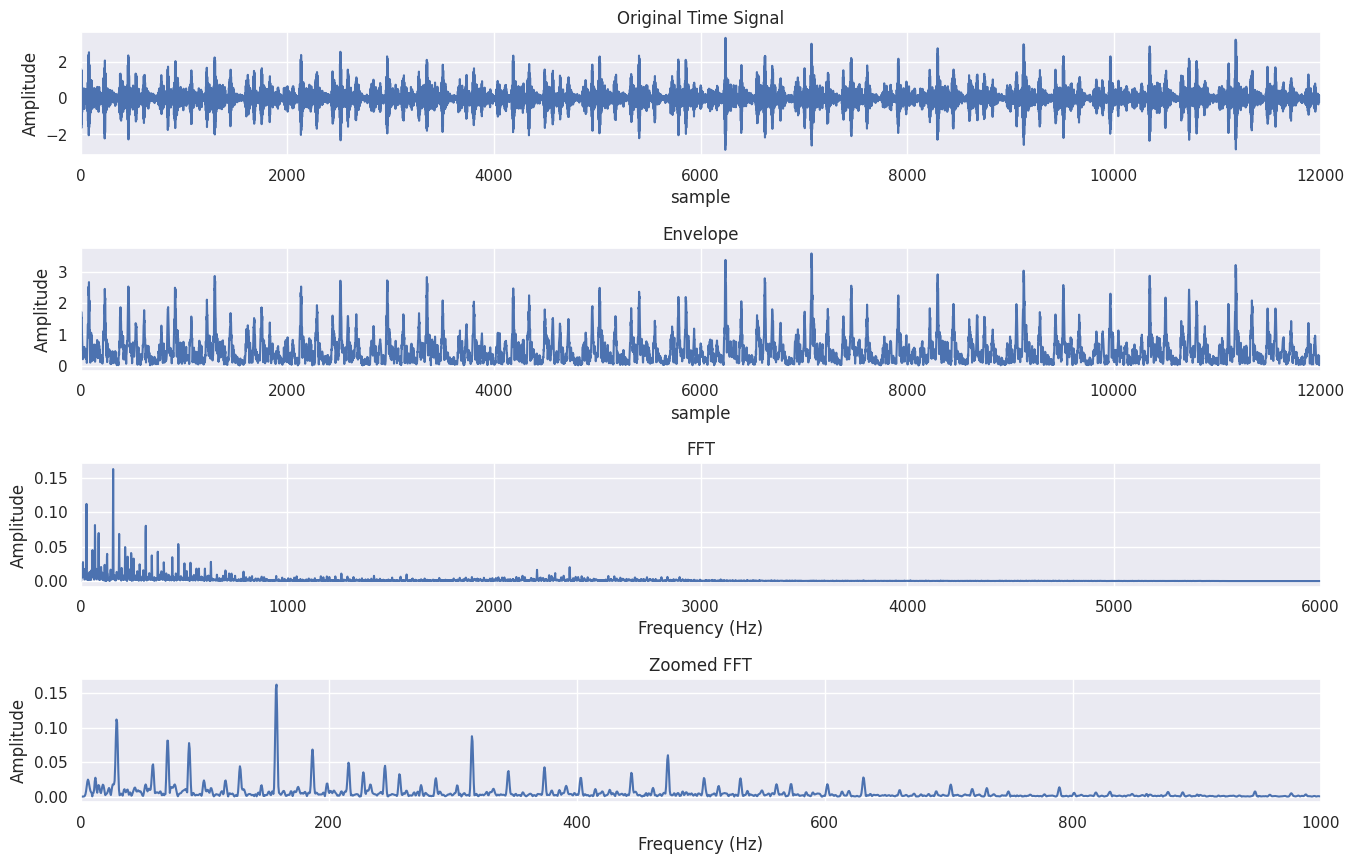

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

fig, axes = plt.subplots(4, 1, figsize = (16, 10))

sns.lineplot(ax=axes[0], x=range(len(signals.iloc[0,:])), y = signals.iloc[0,:])
axes[0].set_title("Original Time Signal")
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("sample")
axes[0].set_xlim(0, 12000)

sns.lineplot(ax=axes[1], x=range(len(signals_env.iloc[0,:])), y = signals_env.iloc[0, :])
axes[1].set_title("Envelope")
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("sample")
axes[1].set_xlim(0, 12000)


sns.lineplot(ax=axes[2], x = fft_freq_axis(12000, 12000), y = signals_env_fft.iloc[0, :])
axes[2].set_title("FFT")
axes[2].set_ylabel("Amplitude")
axes[2].set_xlabel("Frequency (Hz)")
axes[2].set_xlim(0, 6000)


sns.lineplot(ax=axes[3], x = zoomed_fft_freq_axis(0, 1000, 2000), y = signals_env_ZoomedFFT.iloc[0, :])
axes[3].set_title("Zoomed FFT")
axes[3].set_ylabel("Amplitude")
axes[3].set_xlabel("Frequency (Hz)")
axes[3].set_xlim(0, 1000)


plt.subplots_adjust(hspace = 0.75)
fig.show()

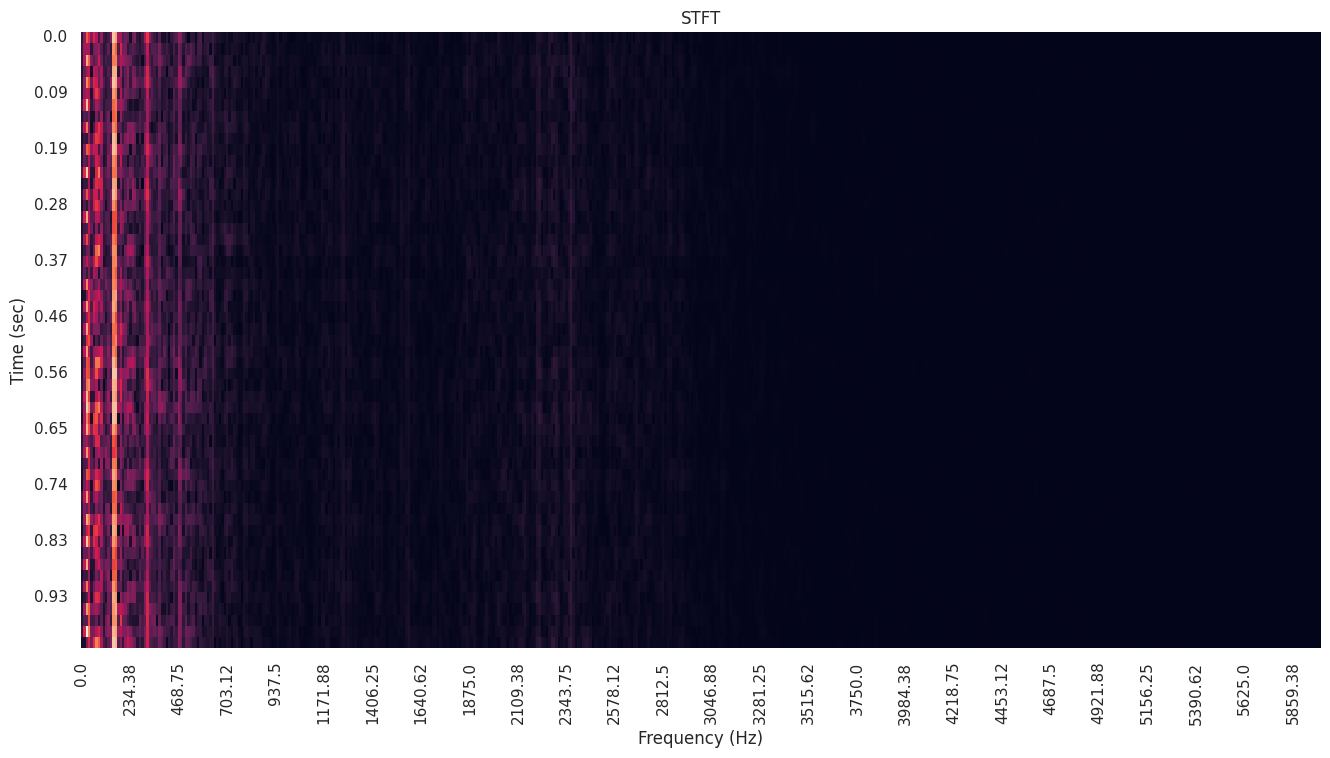

In [ ]:
t = np.linspace(0, 1, 55)
f = fft_freq_axis(1024, 12000)

fig, ax = plt.subplots(figsize = (16, 8))

ax = sns.heatmap(signals_env_STFT[0, :, :], xticklabels = np.round(f, decimals = 2), yticklabels = np.round(t, decimals = 2), annot = False, cbar = False)
ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Time (sec)')
ax.set_title('STFT')
ax.set_xticks(ax.get_xticks()[::20])
ax.set_yticks(ax.get_yticks()[::5])


fig.show()